In [1]:
#imports
import numpy as np
import pandas as pd
from tqdm import tqdm
import scipy.signal as signal #signal processing stuff (e.g. filters, hilbert transform, etc.)
import scipy
import struct
import os
#plotting!
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import nelpy.plotting as npl
import nelpy.io.trodes as neltro
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
#nelpy!
import nelpy as nel
import nelpy.plotting as npl
#make the svg
import svgutils.transform as sg
import sys
from IPython.display import SVG, display, Image
#plots show up within jupyter for matplotlib
%matplotlib inline 

In [2]:
sigmuhz = np.arange(1.5,6.25,0.25)
detectionLatencyCalc = []
relativeDetectionLatencyCalc =[]
fpRateCalc = []
tpRateCalc = []
fpPercentCalc = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativeDetectionLatencyCalc.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc.append(np.loadtxt(OPENME))
detectionLatencyCalc = np.asarray(detectionLatencyCalc)
relativeDetectionLatencyCalc = np.asarray(relativeDetectionLatencyCalc)
fpRateCalc = np.asarray(fpRateCalc)
tpRateCalc = np.asarray(tpRateCalc)
# fpPercentCalc = np.asarray(fpPercentCalc)

detectionLatencyCalc2 = []
relativeDetectionLatencyCalc2 = []
fpRateCalc2 = []
tpRateCalc2 = []
fpPercentCalc2 = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc2.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativeDetectionLatencyCalc2.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc2.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc2.append(np.loadtxt(OPENME)[0:1000])
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoOfThree/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc2.append(np.loadtxt(OPENME))
detectionLatencyCalc2 = np.asarray(detectionLatencyCalc2)
relativeDetectionLatencyCalc2 = np.asarray(relativeDetectionLatencyCalc2)
fpRateCalc2 = np.asarray(fpRateCalc2)
tpRateCalc2 = np.asarray(tpRateCalc2)
# fpPercentCalc2 = np.asarray(fpPercentCalc2)

detectionLatencyCalc1 = []
relativeDetectionLatencyCalc1 = []
fpRateCalc1 = []
tpRateCalc1 = []
fpPercentCalc1 = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc1.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativeDetectionLatencyCalc1.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc1.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc1.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc1.append(np.loadtxt(OPENME))
detectionLatencyCalc1 = np.asarray(detectionLatencyCalc1)
relativeDetectionLatencyCalc1 = np.asarray(relativeDetectionLatencyCalc1)
fpRateCalc1 = np.asarray(fpRateCalc1)
tpRateCalc1 = np.asarray(tpRateCalc1)
# fpPercentCalc1 = np.asarray(fpPercentCalc1)

100%|██████████| 19/19 [00:00<00:00, 53.77it/s]


In [3]:
detectionLatencyCalc2of3 = []
relativedetectionLatencyCalc2of3 = []
fpRateCalc2of3 = []
tpRateCalc2of3 = []
# fpPercentCalc1 = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoOfThree/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc2of3.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoOfThree/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativedetectionLatencyCalc2of3.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoOfThree/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc2of3.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoOfThree/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc2of3.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc1.append(np.loadtxt(OPENME))
detectionLatencyCalc2of3 = np.asarray(detectionLatencyCalc2of3)
relativedetectionLatencyCalc2of3 = np.asarray(relativedetectionLatencyCalc2of3)
fpRateCalc2of3 = np.asarray(fpRateCalc2of3)
tpRateCalc2of3 = np.asarray(tpRateCalc2of3)
# fpPercentCalc1 = np.asarray(fpPercentCalc1)

100%|██████████| 19/19 [00:00<00:00, 616.07it/s]


## Paper

In [436]:
#QuickMaths
tpRateCalc1*=100
tpRateCalc*=100
tpRateCalc2*=100
tpRateCalc2of3*=100
#Calculate 2 standard error curves
#two channel
est_fpr2 = np.mean(fpRateCalc2,axis=1)
sd_fpr2 = 2*np.std(fpRateCalc2,axis=1)
cis_fpr2 = (est_fpr2 - sd_fpr2, est_fpr2 + sd_fpr2)

est_tpr2 = np.mean(tpRateCalc2,axis=1)
sd_tpr2 = 2*np.std(tpRateCalc2,axis=1)
cis_tpr2 = (est_tpr2 - sd_tpr2, est_tpr2 + sd_tpr2)

est_lat2 = np.mean(detectionLatencyCalc2,axis=1)
sd_lat2 = 2*np.std(detectionLatencyCalc2,axis=1)
cis_lat2 = (est_lat2 - sd_lat2, est_lat2 + sd_lat2)

#single channel
est_fpr = np.mean(fpRateCalc,axis=1)
sd_fpr = 2*np.std(fpRateCalc,axis=1)
cis_fpr = (est_fpr - sd_fpr, est_fpr + sd_fpr)

est_tpr = np.mean(tpRateCalc,axis=1)
sd_tpr = 2*np.std(tpRateCalc,axis=1)
cis_tpr = (est_tpr - sd_tpr, est_tpr + sd_tpr)

est_lat = np.mean(detectionLatencyCalc,axis=1)
sd_lat = 2*np.std(detectionLatencyCalc,axis=1)
cis_lat = (est_lat - sd_lat, est_lat + sd_lat)

In [600]:
sns.set(rc={'figure.figsize': (1.75,1.75),'lines.linewidth': 1, 'font.size': 9.6, 'axes.labelsize': 9.6, 'axes.titlesize':9.6, 'legend.fontsize': 6.4, 'ytick.labelsize': 8, 'xtick.labelsize': 8, 'svg.fonttype' : 'none', 'axes.labelpad' : 1.2 })
sns.set_style('white')
sns.set_color_codes(palette='deep')
saveFigs = True

SINGLECHANNELCOLOR = 'k'
SINGLECHANNELSHAPES='o'
TWOCHANNELCOLOR = 'red'
TWOCHANNELSHAPES = 'o'
alfa_2Chan = 0.01
alfa_1Chan = 0.1
tpRateLim = [50,103]
fsRateLim = [-4,90]
thresholdLim = [1.25,6.5]
detectLatLim = [29,105]

In [601]:
def tsplot(ax, data=None,x=None,alpha_fill=0.2,axis=1,**kw):
    if x is None:
        raise AttributeError("x must be passed in!")
    if data is None:
        raise AttributeError("need data!")
    est = np.mean(data, axis=axis)
    sd = 2*np.std(data, axis=axis)
    cis = (est - sd, est + sd)
    ax.fill_between(x,cis[0],cis[1],alpha=alpha_fill, **kw)
    ax.plot(x,est,**kw)
    ax.margins(x=0)

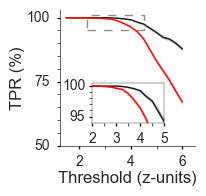

In [602]:
#TP RATE vs THRESHOLD

#main plot
ax = plt.gca()
tsplot(ax,data=tpRateCalc,x=1.5+(np.ones(tpRateCalc1.shape[0])*np.arange(0,tpRateCalc1.shape[0])*0.25),color=SINGLECHANNELCOLOR)
tsplot(ax,data=tpRateCalc2,x=1.5+(np.ones(tpRateCalc1.shape[0])*np.arange(0,tpRateCalc1.shape[0])*0.25),color=TWOCHANNELCOLOR)
plt.xlabel("Threshold (z-units)")
plt.ylabel("TPR (%)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks
ax.set_xticks(np.arange(2,7,2))
minorLocator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(50,110,25))
minorLocator = AutoMinorLocator(5)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.ylim(tpRateLim)
plt.xlim(thresholdLim)

#inset location
ax.add_patch(
    patches.Rectangle(
        (2,95), #(x,y)
        5-2, #width
        101-95,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)

#inset
axins = inset_axes(parent_axes=ax,
                    width=0.72,
                    height=0.4,
                    loc=5,
                    bbox_to_anchor=(0.85, 0.37), 
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )
tsplot(axins,data=tpRateCalc,x=1.5+(np.ones(tpRateCalc1.shape[0])*np.arange(0,tpRateCalc1.shape[0])*0.25),color=SINGLECHANNELCOLOR)
tsplot(axins,data=tpRateCalc2,x=1.5+(np.ones(tpRateCalc1.shape[0])*np.arange(0,tpRateCalc1.shape[0])*0.25),color=TWOCHANNELCOLOR)
#spine width
[i.set_linewidth(0.3) for i in axins.spines.values()]
#ticks
plt.minorticks_on()

axins.set_xlim(2.3,5)
axins.set_xticks(np.arange(2,6,1))
minorLocator = AutoMinorLocator(2)
axins.xaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

axins.set_ylim(94,100.5)
axins.set_yticks(np.arange(95,102,5))
minorLocator = AutoMinorLocator(5)
axins.yaxis.set_minor_locator(minorLocator)
axins.yaxis.tick_left()
axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/tpThresh.svg',transparent=True)
plt.show()

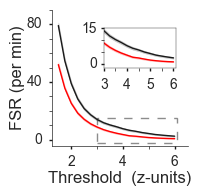

In [603]:
#FALSE STIM RATE vs THRESHOLD
ax=plt.gca()
tsplot(ax,data=fpRateCalc,x=1.5+(np.ones(tpRateCalc1.shape[0])*np.arange(0,tpRateCalc1.shape[0])*0.25),color=SINGLECHANNELCOLOR)
tsplot(ax,data=fpRateCalc2,x=1.5+(np.ones(tpRateCalc1.shape[0])*np.arange(0,tpRateCalc1.shape[0])*0.25),color=TWOCHANNELCOLOR)
plt.xlabel("Threshold  (z-units)")
plt.ylabel("FSR (per min)")


plt.ylim(fsRateLim)
plt.xlim(thresholdLim)

#ticks
ax.set_xticks(np.arange(2,7,2))
minorLocator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(0,85,40))
minorLocator = AutoMinorLocator(4)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)
#zoom 
ax.add_patch(
    patches.Rectangle(
        (3,-2), #(x,y)
        6.1-3, #width
        15+2,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)
#inset
axins = inset_axes(parent_axes=ax,
                    width=0.72,
                    height=0.4,
                    loc=5,
                    bbox_to_anchor=(0.96, 0.68), 
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )
tsplot(axins,data=fpRateCalc,x=1.5+(np.ones(tpRateCalc1.shape[0])*np.arange(0,tpRateCalc1.shape[0])*0.25),color=SINGLECHANNELCOLOR)
tsplot(axins,data=fpRateCalc2,x=1.5+(np.ones(tpRateCalc1.shape[0])*np.arange(0,tpRateCalc1.shape[0])*0.25),color=TWOCHANNELCOLOR)

#ticks!
plt.minorticks_on()

axins.set_xlim(3,6.1)
axins.set_xticks(np.arange(3,6.1,1))
minorLocator = AutoMinorLocator(2)
axins.xaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

axins.set_ylim(-2,15)
axins.set_yticks(np.arange(0,16,15))
minorLocator = AutoMinorLocator(3)
axins.yaxis.set_minor_locator(minorLocator)
axins.yaxis.tick_left()
axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

#spine width
[i.set_linewidth(0.3) for i in axins.spines.values()]

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fpThresh.svg',transparent=True)
plt.show()

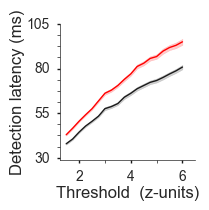

In [604]:
#DETECTION LATENCY vs THRESHOLD
ax=plt.gca()
tsplot(ax,data=detectionLatencyCalc,x=1.5+(np.ones(tpRateCalc1.shape[0])*np.arange(0,tpRateCalc1.shape[0])*0.25),color=SINGLECHANNELCOLOR)
tsplot(ax,data=detectionLatencyCalc2,x=1.5+(np.ones(tpRateCalc1.shape[0])*np.arange(0,tpRateCalc1.shape[0])*0.25),color=TWOCHANNELCOLOR)
plt.xlabel("Threshold  (z-units)")
plt.ylabel("Detection latency (ms)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks
ax.set_xticks(np.arange(2,7,2))
minorLocator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(30,110,25))
minorLocator = AutoMinorLocator(4)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.xlim(thresholdLim)
plt.ylim(detectLatLim)

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/latThresh.svg',transparent=True)
plt.show()

# #RELATIVE DETECTION LATENCY vs THRESHOLD
# ax=plt.gca()
# tsplot(ax,data=relativeDetectionLatencyCalc*100,x=1.5+(np.ones(tpRateCalc1.shape[0])*np.arange(0,tpRateCalc1.shape[0])*0.25),color=SINGLECHANNELCOLOR)
# tsplot(ax,data=relativeDetectionLatencyCalc2*100,x=1.5+(np.ones(tpRateCalc1.shape[0])*np.arange(0,tpRateCalc1.shape[0])*0.25),color=TWOCHANNELCOLOR)
# plt.xlabel("Threshold (z-units)")
# plt.ylabel("Relative latency (%)")
# plt.xlim(thresholdLim)
# plt.ylim([20,45])

# #spine width
# [i.set_linewidth(0.5) for i in ax.spines.values()]

# #ticks
# ax.set_xticks(np.arange(2,7,2))
# minorLocator = AutoMinorLocator(2)
# ax.xaxis.set_minor_locator(minorLocator)
# ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
# ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

# ax.set_yticks(np.arange(20,51,15))
# minorLocator = AutoMinorLocator(3)
# ax.yaxis.set_minor_locator(minorLocator)
# ax.yaxis.tick_left()
# ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
# ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

# npl.utils.clear_right(ax)
# npl.utils.clear_top(ax)

# if saveFigs:
#     plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/relativeLatThresh.svg',transparent=True)
# plt.show()

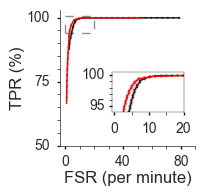

In [605]:
#TP vs FALSE STIM RATE
ax=plt.gca()
plt.plot(est_fpr,est_tpr,color=SINGLECHANNELCOLOR)
plt.plot(est_fpr,cis_tpr[0],linestyle=':',color=SINGLECHANNELCOLOR)
plt.plot(est_fpr,cis_tpr[1],linestyle=':',color=SINGLECHANNELCOLOR)
plt.fill_betweenx(est_tpr,cis_fpr[0],cis_fpr[1],alpha=0.2,color=SINGLECHANNELCOLOR)
plt.plot(est_fpr2,est_tpr2,color=TWOCHANNELCOLOR)
plt.plot(est_fpr2,cis_tpr2[0],linestyle=':',color=TWOCHANNELCOLOR)
plt.plot(est_fpr2,cis_tpr2[1],linestyle=':',color=TWOCHANNELCOLOR)
plt.fill_betweenx(est_tpr2,cis_fpr2[0],cis_fpr2[1],alpha=0.2,color=TWOCHANNELCOLOR)
plt.xlabel("FSR (per minute)")
plt.ylabel("TPR (%)")
#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]
#ticks 
ax.set_xticks(np.arange(0,85,40))
minorLocator = AutoMinorLocator(4)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(50,110,25))
minorLocator = AutoMinorLocator(5)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.xlim(fsRateLim)
plt.ylim(tpRateLim)

#rectangle
ax.add_patch(
    patches.Rectangle(
        (0,94), #(x,y)
        20, #width
        100.5-94,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)

#inset
axins = inset_axes(parent_axes=ax,
        width=0.72,
        height=0.4,
        loc=5,
        bbox_to_anchor=(0.96, 0.43), 
        bbox_transform=ax.figure.transFigure,
        borderpad=2,
      )
#2 standard errors!
axins.plot(est_fpr,est_tpr,color=SINGLECHANNELCOLOR)
axins.plot(est_fpr,cis_tpr[0],linestyle=':',color=SINGLECHANNELCOLOR)
axins.plot(est_fpr,cis_tpr[1],linestyle=':',color=SINGLECHANNELCOLOR)
axins.fill_betweenx(est_tpr,cis_fpr[0],cis_fpr[1],alpha=0.2,color=SINGLECHANNELCOLOR)
axins.plot(est_fpr2,est_tpr2,color=TWOCHANNELCOLOR)
axins.plot(est_fpr2,cis_tpr2[0],linestyle=':',color=TWOCHANNELCOLOR)
axins.plot(est_fpr2,cis_tpr2[1],linestyle=':',color=TWOCHANNELCOLOR)
axins.fill_betweenx(est_tpr2,cis_fpr2[0],cis_fpr2[1],alpha=0.2,color=TWOCHANNELCOLOR)

#spine width
[i.set_linewidth(0.3) for i in axins.spines.values()]

#ticks!
plt.minorticks_on()

axins.set_xlim(-0.8,20)
axins.set_xticks(np.arange(0,21,10))
minorLocator = AutoMinorLocator(2)
axins.xaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

axins.set_ylim(94,100.5)
axins.set_yticks(np.arange(95,102,5))
minorLocator = AutoMinorLocator(5)
axins.yaxis.set_minor_locator(minorLocator)
axins.yaxis.tick_left()
axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/tpFsr.svg',transparent=True)
plt.show()

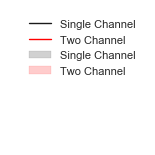

In [606]:
#Just saving the legend as a separate SVG here
#TP vs FALSE STIM RATE
ax = plt.gca()
tsplot(ax,data=tpRateCalc,x=1.5+(np.ones(tpRateCalc1.shape[0])*np.arange(0,tpRateCalc1.shape[0])*0.25),color=SINGLECHANNELCOLOR,label='Single Channel')
tsplot(ax,data=tpRateCalc2,x=1.5+(np.ones(tpRateCalc1.shape[0])*np.arange(0,tpRateCalc1.shape[0])*0.25),color=TWOCHANNELCOLOR,label='Two Channel')
plt.xlabel("False stimulations per second")
plt.ylabel("True positive percentage (%)")
plt.xlim([0,0.000001])
# plt.legend(loc='lower right')
plt.ylim([0,0.000004])
# leg = plt.legend(bbox_to_anchor=(1,0.2),loc=2)
handles,labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles,labels)
plt.gca().yaxis.set_visible(False)
plt.gca().xaxis.set_visible(False)
for v in plt.gca().spines.values():
    v.set_visible(False)
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/legend_lines.svg',bbox_inches='tight',transparent=True)
plt.show()

# Final Figure

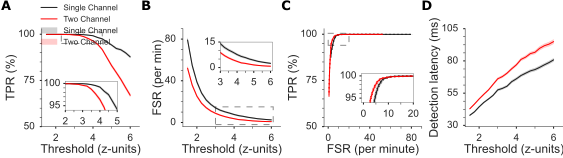

In [4]:
#create new SVG figure
fig = sg.SVGFigure("6.25in", "1.75in")

#load matplotlib-generated figures
tpThresh = sg.fromfile("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/tpThresh.svg")
fsrThresh = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fpThresh.svg')
relDetThresh = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/relativeLatThresh.svg')
latThresh = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/latThresh.svg')
tpLat = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/latTP.svg')
fsrLat = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/latFPStim.svg')
tpFsp = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/tpFsr.svg')
legend = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/legend.svg')
legend_lines = sg.fromfile("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/legend_lines.svg")

#get the plot objects
tpThreshPlot1 = tpThresh.getroot()
fsrThreshPlot2 = fsrThresh.getroot()
relDetThreshPlot4 = relDetThresh.getroot()
latThreshPlot3 = latThresh.getroot()
tpLatPlot1 = tpLat.getroot()
fsrLatPlot2 = fsrLat.getroot()
tpFspPlot3 = tpFsp.getroot()
legendPlot = legend.getroot()
legendLinesPlot = legend_lines.getroot()

plotspacing = 141
plotInitLoc = 26
plotVerticalDisplacement = 16
textspacing = 140
textInitLoc = 1
textVerticalDisplacement = 10

tpThreshPlot1.moveto(26, plotVerticalDisplacement, scale=1)
fsrThreshPlot2.moveto(plotspacing+plotInitLoc, plotVerticalDisplacement, scale=1)
tpFspPlot3.moveto(plotspacing+plotspacing+plotInitLoc, plotVerticalDisplacement, scale=1)
latThreshPlot3.moveto(plotspacing+plotspacing+plotspacing+plotInitLoc, plotVerticalDisplacement, scale=1)

legendLinesPlot.moveto(20,-10,scale=1)

#add text labels
txt1 = sg.TextElement(1,textVerticalDisplacement, "A", size=13, weight="bold")
txt2 = sg.TextElement(textspacing+textInitLoc,textVerticalDisplacement, "B", size=13, weight="bold")
txt3 = sg.TextElement(textspacing+textspacing+textInitLoc,textVerticalDisplacement,"C", size=13, weight='bold')
txt4 = sg.TextElement(textspacing+textspacing+textspacing+textInitLoc,textVerticalDisplacement,"D", size=13, weight='bold')

# append plots and labels to figure
fig.append([tpThreshPlot1, fsrThreshPlot2, latThreshPlot3, tpFspPlot3,\
           legendLinesPlot])
fig.append([txt1, txt2, txt3, txt4,])

fig.save("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.svg")
os.system("inkscape --export-png=/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.png /home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.svg")
display(Image(filename='/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.png'))

Combine legend lines on inkscape then generate final figure

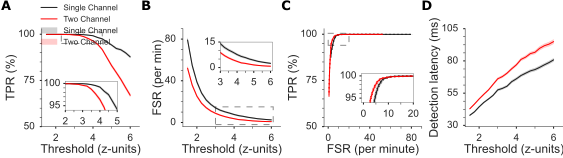

In [5]:
os.system("inkscape --export-png=/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.png /home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.svg")
os.system("inkscape --export-pdf=/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.pdf /home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.svg")
display(Image(filename='/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.png'))